# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

  Obtaining dependency information for gdown from https://files.pythonhosted.org/packages/54/70/e07c381e6488a77094f04c85c9caf1c8008cdc30778f7019bc52e5285ef0/gdown-5.2.0-py3-none-any.whl.metadata
/Users/mariyayousef/anaconda3/lib/python3.11/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /Users/mariyayousef/Q4/Bus_Breakdown_and_Delays.csv
100%|██████████████████████████████████████| 34.4M/34.4M [00:01<00:00, 17.4MB/s]


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2024-08-18 08:10:43.425142: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [4]:
df=pd.read_csv('Bus_Breakdown_and_Delays.csv')
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age


In [5]:
# Inspect the Dataset Structure
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Structure:")
print(df.info())

First few rows of the dataset:
  School_Year  Busbreakdown_ID  Run_Type Bus_No Route_Number         Reason  \
0   2015-2016          1224901  Pre-K/EI    811            1          Other   
1   2015-2016          1225098  Pre-K/EI   9302            1  Heavy Traffic   
2   2015-2016          1215800  Pre-K/EI    358            2  Heavy Traffic   
3   2015-2016          1215511  Pre-K/EI    331            2          Other   
4   2015-2016          1215828  Pre-K/EI    332            2          Other   

  Schools_Serviced             Occurred_On              Created_On   Boro  \
0             C353  10/26/2015 08:30:00 AM  10/26/2015 08:40:00 AM  Bronx   
1             C814  10/27/2015 07:10:00 AM  10/27/2015 07:11:00 AM  Bronx   
2             C195  09/18/2015 07:36:00 AM  09/18/2015 07:38:00 AM  Bronx   
3             C178  09/17/2015 08:08:00 AM  09/17/2015 08:12:00 AM  Bronx   
4             S176  09/18/2015 07:39:00 AM  09/18/2015 07:45:00 AM  Bronx   

   ... How_Long_Delayed Number_

In [6]:
#Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Busbreakdown_ID  Number_Of_Students_On_The_Bus
count     1.479720e+05                  147972.000000
mean      1.287779e+06                       3.590071
std       4.324338e+04                      55.365859
min       1.212681e+06                       0.000000
25%       1.250438e+06                       0.000000
50%       1.287844e+06                       0.000000
75%       1.325191e+06                       4.000000
max       1.362605e+06                    9007.000000


In [7]:
df.sample()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
79542,2016-2017,1300333,Special Ed AM Run,1344,M922,Other,03480,11/16/2016 06:52:00 AM,11/16/2016 06:54:00 AM,Manhattan,...,25-30 MINS,0,Yes,Yes,No,11/16/2016 06:54:00 AM,NaN,11/16/2016 06:54:07 AM,Running Late,School-Age


In [8]:
#Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64


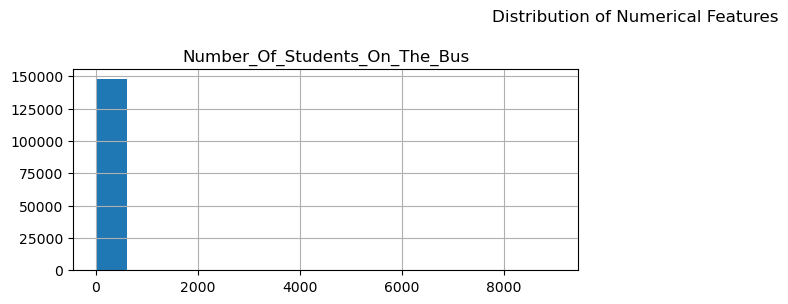

In [10]:
# Distribution of Numerical Features
numerical_features = ['Number_Of_Students_On_The_Bus']
df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [ ]:
# Categorical Feature Analysis
categorical_features = ['Reason', 'Breakdown_or_Running_Late']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:
#Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Outlier detection
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Outlier Detection in {feature}')
    plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [12]:
#Handle Missing Values
df.isnull().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

In [16]:
df['Run_Type'].fillna(df['Run_Type'].mode()[0], inplace=True)
df['Route_Number'].fillna(df['Route_Number'].mode()[0], inplace=True)
df['Reason'].fillna(df['Reason'].mode()[0], inplace=True)
df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)

In [17]:
df.isnull().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                                0
Bus_No                                  0
Route_Number                            0
Reason                                  0
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                    0
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

In [18]:
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0], inplace=True)
df.drop(columns=['Incident_Number'], inplace=True)
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

School_Year                        0
Busbreakdown_ID                    0
Run_Type                           0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
How_Long_Delayed                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Informed_On                        0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64

In [20]:
#one hotencode
df_onehot = pd.get_dummies(df, columns=['Run_Type', 'Boro', 'Reason', 'Bus_Company_Name', 
                                        'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 
                                        'Have_You_Alerted_OPT', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'])


In [37]:
label_encoder = LabelEncoder()
df['Run_Type'] = label_encoder.fit_transform(df['Run_Type'])
df['Boro'] = label_encoder.fit_transform(df['Boro'])
df['Reason'] = label_encoder.fit_transform(df['Reason'])
df['Bus_Company_Name'] = label_encoder.fit_transform(df['Bus_Company_Name'])
df['Has_Contractor_Notified_Schools'] = label_encoder.fit_transform(df['Has_Contractor_Notified_Schools'])
df['Has_Contractor_Notified_Parents'] = label_encoder.fit_transform(df['Has_Contractor_Notified_Parents'])
df['Have_You_Alerted_OPT'] = label_encoder.fit_transform(df['Have_You_Alerted_OPT'])
df['Breakdown_or_Running_Late'] = label_encoder.fit_transform(df['Breakdown_or_Running_Late'])
df['School_Age_or_PreK'] = label_encoder.fit_transform(df['School_Age_or_PreK'])
df['School_Year']= label_encoder.fit_transform(df['School_Year'])

In [23]:
#Scale and Normalize Data
scaler= StandardScaler()
numeric_columns = ['Number_Of_Students_On_The_Bus'] 


In [24]:
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['Created_On'] = pd.to_datetime(df['Created_On'])


In [25]:
df['Occurred_Year'] = df['Occurred_On'].dt.year
df['Occurred_Month'] = df['Occurred_On'].dt.month
df['Occurred_Day'] = df['Occurred_On'].dt.day
df['Occurred_DayOfWeek'] = df['Occurred_On'].dt.dayofweek
df['Occurred_Hour'] = df['Occurred_On'].dt.hour

In [26]:
df['Time_Difference_Hours'] = (df['Created_On'] - df['Occurred_On']).dt.total_seconds() / 3600

In [27]:
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Occurred_Year,Occurred_Month,Occurred_Day,Occurred_DayOfWeek,Occurred_Hour,Time_Difference_Hours
0,2015-2016,1224901,3,811,1,6,C353,2015-10-26 08:30:00,2015-10-26 08:40:00,1,...,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,1,0,2015,10,26,0,8,0.166667
1,2015-2016,1225098,3,9302,1,3,C814,2015-10-27 07:10:00,2015-10-27 07:11:00,1,...,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,1,0,2015,10,27,1,7,0.016667
2,2015-2016,1215800,3,358,2,3,C195,2015-09-18 07:36:00,2015-09-18 07:38:00,1,...,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,1,0,2015,9,18,4,7,0.033333
3,2015-2016,1215511,3,331,2,6,C178,2015-09-17 08:08:00,2015-09-17 08:12:00,1,...,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,1,0,2015,9,17,3,8,0.066667
4,2015-2016,1215828,3,332,2,6,S176,2015-09-18 07:39:00,2015-09-18 07:45:00,1,...,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,1,0,2015,9,18,4,7,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,3,9345,2,3,C530,2017-04-05 08:00:00,2017-04-05 08:10:00,1,...,04/05/2017 08:10:00 AM,04/05/2017 08:10:15 AM,1,0,2017,4,5,2,8,0.166667
147968,2016-2017,1341521,3,0001,5,3,C579,2017-04-24 07:42:00,2017-04-24 07:44:00,1,...,04/24/2017 07:44:00 AM,04/24/2017 07:44:15 AM,1,0,2017,4,24,0,7,0.033333
147969,2016-2017,1353044,9,GC0112,X928,3,09003,2017-05-25 16:22:00,2017-05-25 16:28:00,1,...,05/25/2017 04:28:00 PM,05/25/2017 04:34:36 PM,1,1,2017,5,25,3,16,0.100000
147970,2016-2017,1353045,9,5525D,Q920,9,24457,2017-05-25 16:27:00,2017-05-25 16:30:00,7,...,05/25/2017 04:30:00 PM,05/25/2017 04:30:07 PM,0,1,2017,5,25,3,16,0.050000


In [28]:
df = df.drop_duplicates()

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   School_Year                      147972 non-null  int64         
 1   Busbreakdown_ID                  147972 non-null  int64         
 2   Run_Type                         147972 non-null  int64         
 3   Bus_No                           147972 non-null  object        
 4   Route_Number                     147972 non-null  object        
 5   Reason                           147972 non-null  int64         
 6   Schools_Serviced                 147972 non-null  object        
 7   Occurred_On                      147972 non-null  datetime64[ns]
 8   Created_On                       147972 non-null  datetime64[ns]
 9   Boro                             147972 non-null  int64         
 10  Bus_Company_Name                 147972 non-

In [29]:
X = df.drop(columns=['Breakdown_or_Running_Late'])
y = df['Breakdown_or_Running_Late']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [41]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/Users/mariyayousef/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [33]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:
history = model.history  


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


## Save the Model
Save the trained model for submission.

In [ ]:
model.save('customer_churn_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: